In [37]:
import networkx as nx
import pandas as pd
import numpy as np
from itertools import combinations

In [38]:
df = pd.read_csv("movie_info.csv")
df.head()

Title  Year Release Date  \
0           Bride of Frankenstein  1935   1935-04-20   
1  An American Werewolf in London  1981   1981-08-21   
2                          Climax  2018   2018-09-19   
3     The Cabinet of Dr. Caligari  1920   1920-02-27   
4                 The Sixth Sense  1999   1999-08-06   

                                            Overview  \
0  Dr. Frankenstein and his monster both turn out...   
1  American tourists David and Jack are savaged b...   
2  When a dance troupe is lured to an empty schoo...   
3  Francis, a young man, recalls in his memory th...   
4  Following an unexpected tragedy, child psychol...   

                                            Keywords  
0  hermit, monster, lightning, cemetery, mill, ma...  
1  dying and death, london, england, intensive ca...  
2  dancing, child abuse, sexual abuse, drug abuse...  
3  insane asylum, silent film, unreliable narrato...  
4  dying and death, child abuse, philadelphia, pe...

In [39]:
G = nx.Graph()


In [40]:
null_columns = df.columns[df.isnull().any()]

# Imprima as colunas com valores nulos
print("Colunas com valores nulos:")
for col in null_columns:
    print(col)

null_columns = df.columns[df.isnull().any()]

# Imprima as colunas com valores nulos
for col in null_columns:
    null_rows = df[df[col].isnull()]
    print(f"Valores nulos na coluna '{col}':")
    print(null_rows)
    print()

Colunas com valores nulos:
Keywords
Valores nulos na coluna 'Keywords':
                   Title  Year Release Date  \
162         Good Manners  2017   2017-08-04   
216  Witching & Bitching  2013   2013-09-20   
283    Ava's Possessions  2015   2015-03-16   
302                Grace  2009   2009-08-14   

                                              Overview Keywords  
162  Clara, a lonely nurse from the outskirts of Sã...      NaN  
216  A gang of gold thieves lands in a coven of wit...      NaN  
283  Ava is recovering from demonic possession. Wit...      NaN  
302  In the wake of a horrific car accident that ki...      NaN  



In [41]:
from itertools import combinations

# Crie um dicionário para armazenar a contagem de palavras-chave comuns
contagem_palavras_chave_comuns = {}

# Crie um dicionário para armazenar a contagem de palavras-chave comuns
contagem_palavras_chave_comuns = {}

# Itere sobre todas as combinações de filmes
for filme1, filme2 in combinations(df.iterrows(), 2):
    titulo1, palavras_chave1 = filme1[1]["Title"], filme1[1]["Keywords"]
    titulo2, palavras_chave2 = filme2[1]["Title"], filme2[1]["Keywords"]
    
    # Verifique se os valores não são nulos e são strings
    if isinstance(palavras_chave1, str) and isinstance(palavras_chave2, str):
        palavras_chave1 = set(palavras_chave1.split(", "))
        palavras_chave2 = set(palavras_chave2.split(", "))
        
        # Calcule a contagem de palavras-chave comuns
        contagem_comum = len(palavras_chave1 & palavras_chave2)
        
        # Armazene a contagem no dicionário
        contagem_palavras_chave_comuns[(titulo1, titulo2)] = contagem_comum

# Imprima os resultados
for (titulo1, titulo2), contagem in contagem_palavras_chave_comuns.items():
    print(f"({titulo1}, {titulo2}): {contagem} palavras-chave em comum")

(Bride of Frankenstein, An American Werewolf in London): 0 palavras-chave em comum
(Bride of Frankenstein, Climax): 0 palavras-chave em comum
(Bride of Frankenstein, The Cabinet of Dr. Caligari): 0 palavras-chave em comum
(Bride of Frankenstein, The Sixth Sense): 0 palavras-chave em comum
(Bride of Frankenstein, Eraserhead): 0 palavras-chave em comum
(Bride of Frankenstein, Braindead): 0 palavras-chave em comum
(Bride of Frankenstein, The Wicker Man): 1 palavras-chave em comum
(Bride of Frankenstein, A Girl Walks Home Alone at Night): 1 palavras-chave em comum
(Bride of Frankenstein, 28 Days Later): 0 palavras-chave em comum
(Bride of Frankenstein, What We Do in the Shadows): 0 palavras-chave em comum
(Bride of Frankenstein, Black Christmas): 1 palavras-chave em comum
(Bride of Frankenstein, The Evil Dead): 0 palavras-chave em comum
(Bride of Frankenstein, Tenebre): 0 palavras-chave em comum
(Bride of Frankenstein, A Nightmare on Elm Street): 0 palavras-chave em comum
(Bride of Franken

In [42]:
# Defina os títulos dos filmes que você quer comparar
titulo1 = "Friday the 13th Part 2"
titulo2 = "Friday the 13th"

# Verifique se a comparação específica existe no dicionário
if (titulo1, titulo2) in contagem_palavras_chave_comuns:
    contagem = contagem_palavras_chave_comuns[(titulo1, titulo2)]
    print(f"({titulo1}, {titulo2}): {contagem} palavras-chave em comum")
else:
    print(f"Não há comparação registrada entre {titulo1} e {titulo2}")

(Friday the 13th Part 2, Friday the 13th): 8 palavras-chave em comum


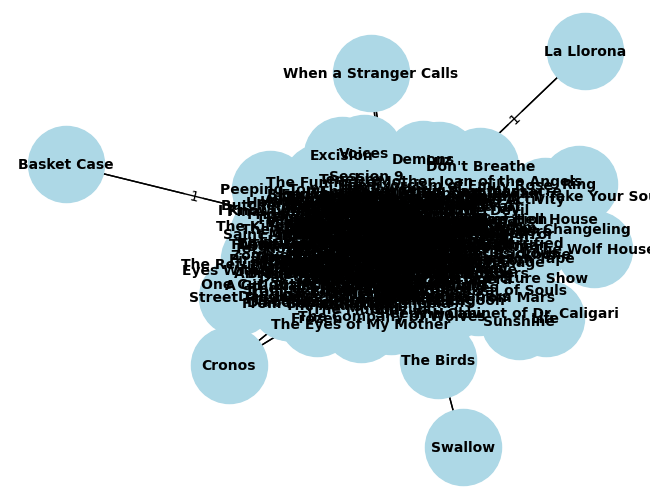

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

# Suponha que você tenha um dicionário chamado 'contagem_palavras_chave_comuns'
# Crie um grafo vazio
G = nx.Graph()

# Adicione as arestas ao grafo com base no dicionário
for (titulo1, titulo2), peso in contagem_palavras_chave_comuns.items():
    if peso > 0:  # Apenas adicione arestas com peso maior que 0
        G.add_edge(titulo1, titulo2, weight=peso)

# Desenhe o grafo
pos = nx.spring_layout(G)  # Layout para o grafo
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Desenhe os nós e as arestas com pesos
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in edges})
nx.draw_networkx_edges(G, pos, width=weights)

# Mostre o grafo
plt.show()

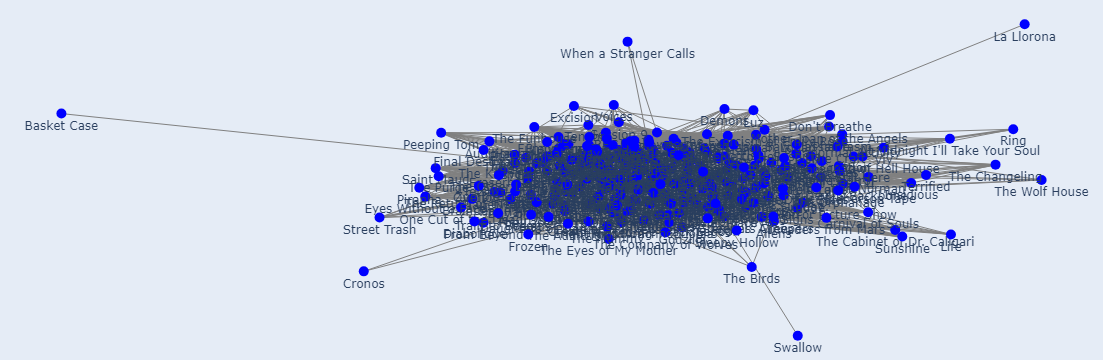

In [44]:
import plotly.graph_objects as go
# Crie listas de arestas e pesos para a plotagem
edge_x = []
edge_y = []
weights = []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    weights.append(G.edges[edge]['weight'])

# Crie a figura
fig = go.Figure()

# Adicione as arestas como linhas
for i in range(0, len(edge_x), 3):
    fig.add_trace(go.Scatter(x=edge_x[i:i+2], y=edge_y[i:i+2], mode='lines',
                             line=dict(width=weights[int(i/3)], color='grey'),
                             hoverinfo='none'))

# Adicione os nós como pontos
for node in G.nodes():
    fig.add_trace(go.Scatter(x=[pos[node][0]], y=[pos[node][1]], mode='markers+text',
                             marker=dict(size=10, color='blue'),
                             text=node, textposition="bottom center",
                             hoverinfo='text'))

# Atualize o layout da figura
fig.update_layout(showlegend=False, hovermode='closest',
                  margin=dict(b=0, l=0, r=0, t=0),
                  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

# Exiba a figura
fig.show()